In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from io import BytesIO

In [ ]:
# github_csv_url = "https://raw.githubusercontent.com/calebade/Hamoye_internship/main/Neural_craft_team/Subnational%20African%20Data_Aug.19.2013.csv"

# response = requests.get(github_csv_url)
# csv_data = response.text
# df = pd.read_csv(StringIO(csv_data))


In [2]:
github_url = "https://raw.githubusercontent.com/calebade/Hamoye_internship/main/Neural_craft_team/Subnational%20African%20Data_Aug.19.2013.xls"

response = requests.get(github_url)
data = response.content
df = pd.read_excel(BytesIO(data))


# I used the excel file instead of the csv since the columns are properly labeled for the excel file

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Country name,ISO code,ISO numeric code,Subnational region name,CCAPS subnational region ID,Year,Data Source,Website,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Literacy rate (15 & over),Literacy rate (15 & over) standard error,Literacy rate (15 & over) size,Literacy rate (15-24),Literacy rate (15-24) standard error,Literacy rate (15-24) size,Literacy rate (15-19),Literacy rate (15-19) standard error,Literacy rate (15-19) size,Literacy rate (25-49),Literacy rate (25-49) standard error,Literacy rate (25-49) size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
0,Burundi,BDI,108,Bubanza,108002,2011,DHS,www.measuredhs.com,62.212669,1.541257,1494.0,102.472580,3.636928,1494.0,7.844529,0.965101,817.0,28.771719,2.819628,818.0,57.797642,2.044328,2144.0,68.016655,2.748220,878.0,76.789223,2.812953,487.0,50.576019,2.023862,1204.0,64.524750,4.098234,7248.0,42.428234,5.014913,7248.0,2.635628,0.943304,7248.0,55.748539,2.021995,7248.0,1.855816,0.639537,7248.0,55.494587,2.013759,7248.0,64.727745,4.048388,1441.0,41.207016,4.939431,1441.0,2.563438,0.932698,1441.0,50.203342,1.984068,1441.0,1.656027,0.644799,1441.0,49.767658,1.906297,1441.0
1,Burundi,BDI,108,Bujumbura Mairie,108003,2011,DHS,www.measuredhs.com,75.802948,1.635965,718.0,112.636269,4.013371,719.0,31.958845,2.921502,563.0,95.412285,6.530486,563.0,88.665176,1.183123,2002.0,88.634804,1.151576,992.0,86.679359,1.827134,513.0,88.821198,1.796425,942.0,90.069534,2.291323,4752.0,86.296799,4.456155,4752.0,62.607437,6.168787,4752.0,80.243233,2.606479,4752.0,53.190296,5.902191,4752.0,81.972755,2.609640,4752.0,88.540581,2.479091,912.0,85.660011,4.584234,912.0,57.100666,6.255036,912.0,75.303909,2.757758,912.0,44.327900,5.504890,912.0,77.148560,2.845784,912.0
2,Burundi,BDI,108,Bujumbura Rural,108004,2011,DHS,www.measuredhs.com,62.212669,1.541257,1494.0,102.472580,3.636928,1494.0,7.844529,0.965101,817.0,28.771719,2.819628,818.0,57.797642,2.044328,2144.0,68.016655,2.748220,878.0,76.789223,2.812953,487.0,50.576019,2.023862,1204.0,64.524750,4.098234,7248.0,42.428234,5.014913,7248.0,2.635628,0.943304,7248.0,55.748539,2.021995,7248.0,1.855816,0.639537,7248.0,55.494587,2.013759,7248.0,64.727745,4.048388,1441.0,41.207016,4.939431,1441.0,2.563438,0.932698,1441.0,50.203342,1.984068,1441.0,1.656027,0.644799,1441.0,49.767658,1.906297,1441.0
3,Burundi,BDI,10

# Exploratory Data Analysis

In [ ]:
df.shape

(471, 68)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 68 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Country name                                            471 non-null    object 
 1   ISO code                                                471 non-null    object 
 2   ISO numeric code                                        471 non-null    int64  
 3   Subnational region name                                 471 non-null    object 
 4   CCAPS subnational region ID                             471 non-null    int64  
 5   Year                                                    471 non-null    int64  
 6   Data Source                                             471 non-null    object 
 7   Website                                                 471 non-null    object 
 8   Net primary attendance rate (%)         

In [ ]:
pd.set_option('display.max_rows', None)
null_values = df.isnull().sum()

print("Columns with Null Values:")
print(null_values)

Columns with Null Values:
Country name                                                0
ISO code                                                    0
ISO numeric code                                            0
Subnational region name                                     0
CCAPS subnational region ID                                 0
Year                                                        0
Data Source                                                 0
Website                                                     0
Net primary attendance rate (%)                             1
Primary NAR standard error                                  1
Primary NAR sample size                                     1
Gross primary attendance rate (%)                           1
Primary GAR standard error                                  1
Primary GAR sample size                                     1
Net secondary attendance rate (%)                           1
Secondary NAR standard error                

# i feel the columns with about 10 and below missing values can be replaced with the mean but a better method has to be used for the ones as high as 124

In [ ]:
df.describe()

,ISO numeric code,CCAPS subnational region ID,Year,Net primary attendance rate (%),Primary NAR standard error,Primary NAR sample size,Gross primary attendance rate (%),Primary GAR standard error,Primary GAR sample size,Net secondary attendance rate (%),Secondary NAR standard error,Secondar NAR sample size,Gross secondary attendance rate (%),Secondary GAR standard error,Secondary GAR sample size,Literacy rate (15 & over),Literacy rate (15 & over) standard error,Literacy rate (15 & over) size,Literacy rate (15-24),Literacy rate (15-24) standard error,Literacy rate (15-24) size,Literacy rate (15-19),Literacy rate (15-19) standard error,Literacy rate (15-19) size,Literacy rate (25-49),Literacy rate (25-49) standard error,Literacy rate (25-49) size,Access to improved water (% of population),Improved Water (% of pop) standard error,Improved Water (% of pop) sample size,Access to improved sanitation (% of population),Improved Sanitation (% of pop) standard error,Improved Sanitation (% of pop) sample size,Electricity in household (% of population),Electricity (% of pop) standard error,Electricity (% of pop) sample size,Radio in household (% of population),Radio (% of pop) standard error,Radio (% of pop) sample size,Television in household (% of population),Television (% of pop) standard error,Television (% of pop) sample size,Radio and/or Television in household (% of population),Radio and/or TV (% of pop) standard error,Radio and/or TV (% of pop) sample size,Access to improved water (% of households),Improved Water (% of hh) standard error,Improved Water (% of hh) sample size,Access to improved sanitation (% of households),Improved Sanitation (% of hh) standard error,Improved Sanitation (% of hh) sample size,Electricity in household (% of households),Electricity (% of hh) standard error,Electricity (% of hh) sample size,Radio in household (% of households),Radio (% of hh) standard error,Radio (% of hh) sample size,Television in household (% of households),Television (% of hh) standard error,Television (% of hh) sample size,Radio and/or television in household (% of households),Radio and/or TV (% of hh) standard error,Radio and/or TV (% of hh) sample size
count,471.000000,471.000000,471.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,449.000000,449.000000,449.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,449.000000,449.000000,449.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,497.152866,497161.866242,2008.131635,69.950883,2.544909,971.844681,102.799593,4.359389,1035.585106,29.586993,2.813817,671.478723,46.098336,4.296504,711.746809,61.434973,2.627702,1806.498559,67.072803,2.989891,852.760807,71.134001,3.523134,374.775216,57.286808,2.787651,1023.190202,60.442817,4.163505,5306.778723,40.165780,2.955834,5302.602128,28.916043,2.885390,5296.064588,62.570418,2.661125,5354.130152,25.859050,2.462269,5353.002169,66.361430,2.578027,5358.386117,60.583051,4.013583,1072.791489,39.920602,2.838389,1071.255319,28.546700,2.764106,1027.467706,59.583969,2.482746,1039.026030,24.049675,2.227461,1038.809111,63.282087,2.438457,1039.780911
std,240.493840,240494.277329,2.053455,21.433693,1.352500,936.529013,31.096263,1.942204,940.250504,20.701757,1.415996,457.832059,28.878346,2.183945,481.824506,25.397349,1.517131,1507.064101,24.195768,1.717665,732.352751,22.232864,2.063453,301.652187,27.039922,1.542747,790.544181,24.733905,2.741863,3981.937583,29.219446,1.995369,3981.623067,30.222012,2.477114,4027.472117,16.507053,1.198700,4003.160271,27.005865,1.836991,4002.051709,18.480074,1.351008,4005

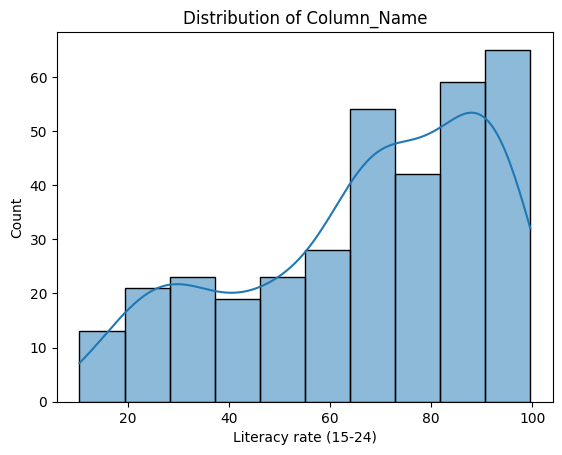

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Literacy rate (15-24)'], kde=True)
plt.title('Distribution of Column_Name')
plt.show()



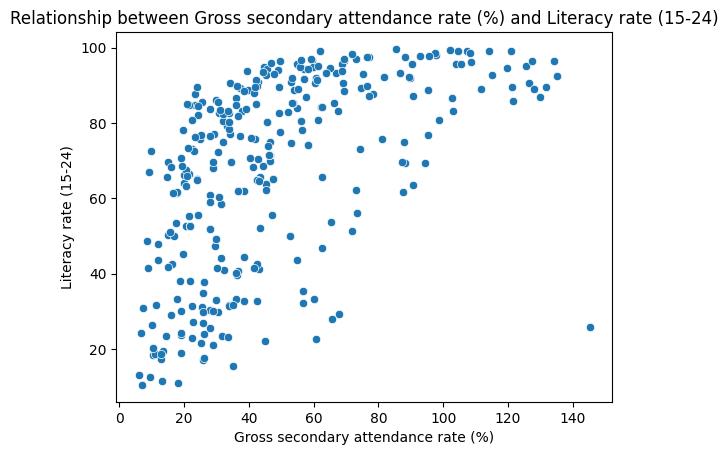

In [5]:
sns.scatterplot(x='Gross secondary attendance rate (%)', y='Literacy rate (15-24)', data=df)
plt.title('Relationship between Gross secondary attendance rate (%) and Literacy rate (15-24)')
plt.show()

<ipython-input-67-b891dc6e5b23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


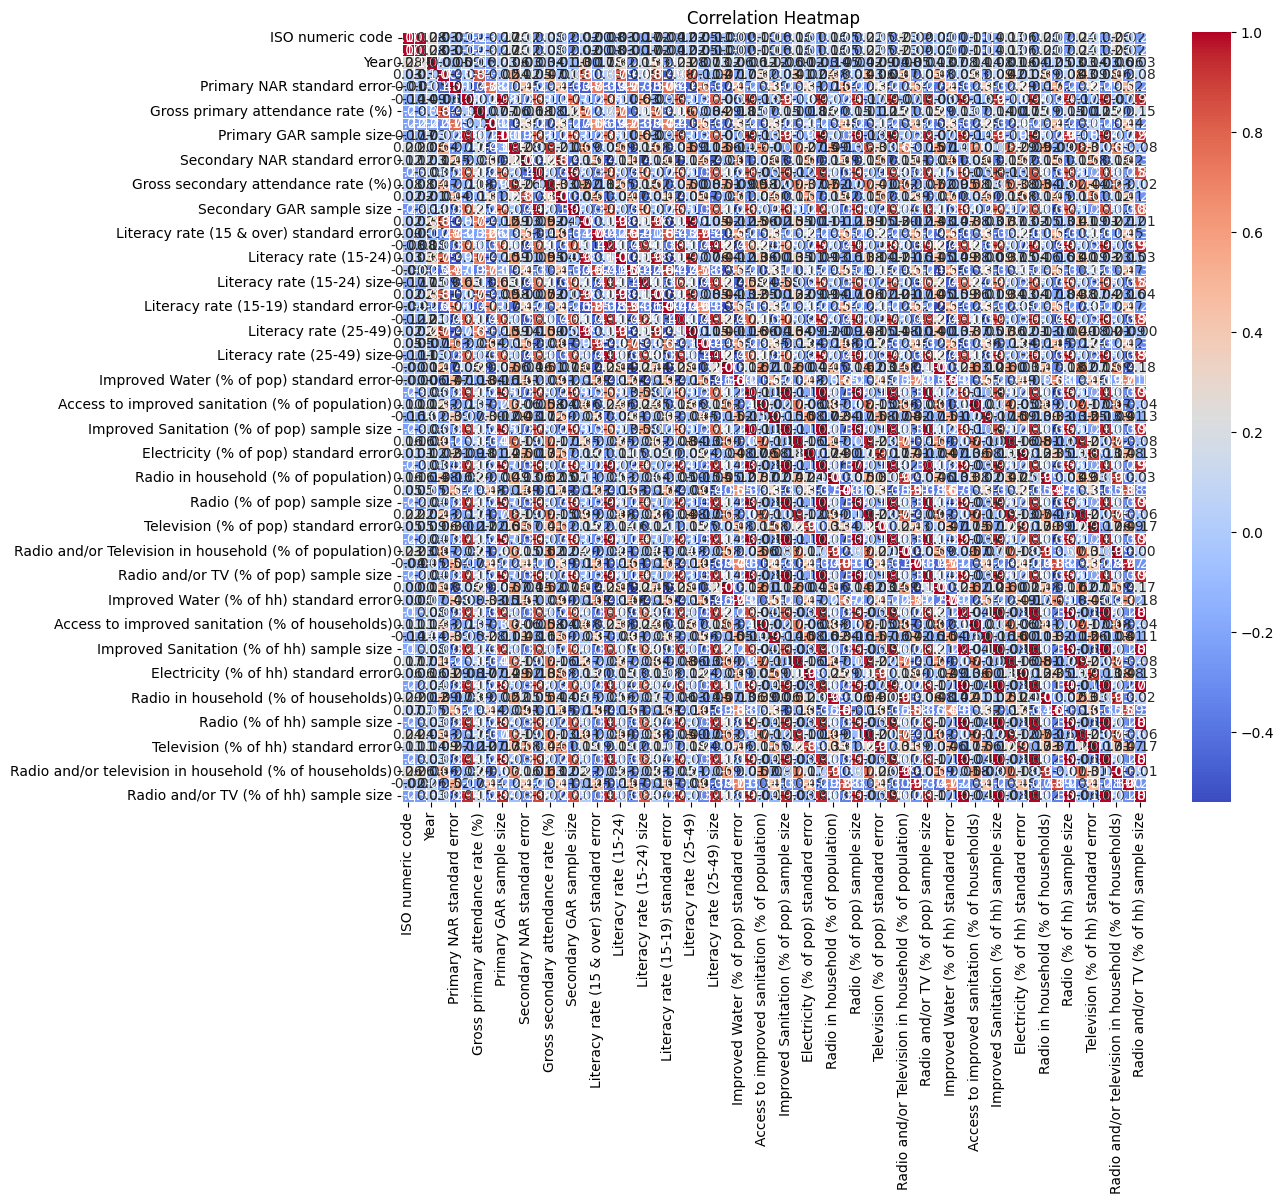

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Nah! too much columns for it to make sense

# correcting missing values

In [6]:
from sklearn.impute import SimpleImputer, KNNImputer

# Columns with less than 15 missing values
columns_to_impute_mean = df.columns[df.isnull().sum() < 15]

# Impute missing values with the mean for numerical columns
for col in columns_to_impute_mean:
    if df[col].dtype == 'object':
        imputer = SimpleImputer(strategy='most_frequent')
    else:
        imputer = SimpleImputer(strategy='mean')
    df[col] = imputer.fit_transform(df[[col]])

# Columns with 15 or more missing values
columns_to_impute_predictive = df.columns[df.isnull().sum() >= 15]

# Impute missing values using KNN imputation for these columns
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors
df[columns_to_impute_predictive] = knn_imputer.fit_transform(df[columns_to_impute_predictive])

# Now, df contains the imputed values


**K-Nearest Neighbors (KNN)** imputation is a technique used to fill missing values in a dataset based on the values of its nearest neighbors. Here's how KNN imputation works:

**1. Select a Distance Metric:** The first step is to choose a distance metric to measure the similarity between data points. Common distance metrics include Euclidean distance, Manhattan distance, or Minkowski distance. The choice of distance metric depends on the nature of your data and the problem you are trying to solve.

**2. Identify Neighbors:** For each data point with missing values, KNN identifies its k-nearest neighbors from the dataset based on the chosen distance metric. These neighbors are the data points that are most similar to the one with missing values.

**3. Calculate Weighted Average:** KNN computes a weighted average of the observed values of the feature in question from the k-nearest neighbors. The weights are typically based on the inverse of the distances; closer neighbors have a higher influence on the imputed value than more distant neighbors.

**4. Fill Missing Values:** The calculated weighted average is used to fill in the missing value for the feature in question in the data point. This process is repeated for each missing value in the dataset.

In [7]:
pd.set_option('display.max_rows', None)
null_values = df.isnull().sum()

print("Columns with Null Values:")
print(null_values)

Columns with Null Values:
Country name                                              0
ISO code                                                  0
ISO numeric code                                          0
Subnational region name                                   0
CCAPS subnational region ID                               0
Year                                                      0
Data Source                                               0
Website                                                   0
Net primary attendance rate (%)                           0
Primary NAR standard error                                0
Primary NAR sample size                                   0
Gross primary attendance rate (%)                         0
Primary GAR standard error                                0
Primary GAR sample size                                   0
Net secondary attendance rate (%)                         0
Secondary NAR standard error                              0
Secondar NAR s

In [12]:
from google.colab import files

# Assuming df is your cleaned DataFrame
df.to_csv('cleaned_dataset.csv', index=False)

# Download the CSV file
files.download('cleaned_dataset.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# This will download the cleaned data into your laptop